In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\vinay\Documents\Python Scripts\train.csv')

In [3]:
print(df.shape)

(42000, 785)


In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data =df.values

In [7]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
x=data[:,1:]
y=data[:,0]

In [9]:
x.shape,y.shape

((42000, 784), (42000,))

In [10]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [12]:
#train test split
split=int(0.8*x.shape[0])

In [13]:
split

33600

In [15]:
x_train=x[:split,:]
y_train=y[:split]

In [16]:
x_test=x[split:,:]
y_test=y[split:]

In [17]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [18]:
#visualise some samples

In [23]:
def drawimage(sample):
    #reshape that image
    img=sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

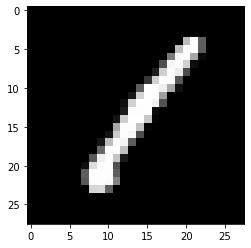

1


In [51]:
drawimage(x_train[0])
print(y_train[0])

In [52]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,querypoint,k=5):
    #pick nearest k nieghbours
    
    vals=[]
    m=x.shape[0]
    #for every point in x
    for i in range(m):
        #compute distance
            d=dist(querypoint,x[i])
            vals.append((d,y[i]))
    
    
    #sort the array na dfind k nearest points
    vals=sorted(vals)
    vals=vals[:k]
    #majority vote
    vals=np.array(vals)
    
    #returns count of each class of vals 
    newvals=np.unique(vals[:,1], return_counts=True)
    print(newvals)
    
    # index of the maximum count
    index=newvals[1].argmax()
    #map this index with data
    pred=newvals[0][index]
    
    return pred

In [29]:
#make predictions over test images

In [55]:
pred=knn(x_train,y_train,x_test[10])

(array([3.]), array([5], dtype=int64))


In [56]:
pred

3.0

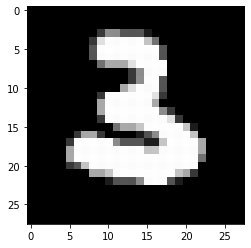

In [57]:
drawimage(x_test[10])